<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Mini Project 1

## Prediction of Consumer Price Index of Australia

### Data

The Consumer Price Index (CPI) measures household inflation and includes statistics about price change for categories of household expenditure.The CPI data caputured from Australian bureau of statistics (ABS) and contains data from September 1948

In [1]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


### 1. Explore Data

Perform EDA on this dataset. 

In [2]:
# Read CSV first 5 rows
cpi = pd.read_csv ('CPIv0.1.csv')
cpi.head()

,Quarter,Sydney,Melbourne,Brisbane,Adelaide,Perth,Hobart,Darwin,Canberra,Australia
0,1/09/1948,3.7,3.8,3.7,3.8,3.7,3.8,3.9,3.9,3.7
1,1/12/1948,3.7,3.8,3.7,3.9,3.8,3.9,4.1,4.1,3.8
2,1/03/1949,3.9,3.9,3.8,4.0,3.9,4.0,4.1,4.1,3.9
3,1/06/1949,3.9,4.0,3.9,4.0,4.0,4.1,4.2,4.2,4.0
4,1/09/1949,4.0,4.1,4.0,4.1,4.1,4.1,4.3,4.3,4.1


In [6]:
# Read CSV last 5 rows
cpi.tail()

,Quarter,Sydney,Melbourne,Brisbane,Adelaide,Perth,Hobart,Darwin,Canberra,Australia
287,1/06/2020,114.7,115.7,113.6,114.6,112.1,115.6,109.0,112.8,114.4
288,1/09/2020,116.8,116.7,116.2,115.7,114.1,116.7,110.8,115.4,116.2
289,1/12/2020,118.0,118.4,117.5,116.5,113.0,117.6,111.5,116.3,117.2
290,1/03/2021,118.5,118.8,118.2,117.2,114.6,118.5,114.4,117.3,117.9
291,1/06/2021,119.4,119.1,119.2,117.8,116.8,119.8,115.6,118.2,118.8


In [7]:
# Read CSV to identify the no. of rows and columns
cpi.shape

(292, 10)

In [3]:
# Read CSV to identify the data types
cpi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292 entries, 0 to 291
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Quarter    292 non-null    object 
 1   Sydney     292 non-null    float64
 2   Melbourne  292 non-null    float64
 3   Brisbane   292 non-null    float64
 4   Adelaide   292 non-null    float64
 5   Perth      292 non-null    float64
 6   Hobart     292 non-null    float64
 7   Darwin     292 non-null    float64
 8   Canberra   292 non-null    float64
 9   Australia  292 non-null    float64
dtypes: float64(9), object(1)
memory usage: 22.9+ KB


In [4]:
# Read CSV to identify the statistical data like percentile, mean and std of DataFrames
cpi.describe()

,Sydney,Melbourne,Brisbane,Adelaide,Perth,Hobart,Darwin,Canberra,Australia
count,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000
mean,46.666781,46.907877,46.018493,46.257877,46.169521,46.853082,46.957877,46.570205,46.550342
std,38.081718,37.954505,37.666495,37.684170,37.400967,37.579791,37.383572,37.422287,37.849270
min,3.700000,3.800000,3.700000,3.800000,3.700000,3.800000,3.900000,3.900000,3.700000
25%,8.500000,8.900000,8.775000,8.675000,8.775000,9.000000,9.000000,9.000000,8.675000
50%,37.350000,38.150000,37.350000,37.450000,37.500000,38.500000,40.100000,38.400000,37.650000
75%,79.400000,79.600000,76.700000,78.625000,76.525000,78.725000,77.750000,78.100000,78.600000
max,119.400000,119.100000,119.200000,117.800000,116.800000,119.800000,115.600000,118.200000,118.800000


In [5]:
# Drop 'Australia' from DataFrames
cpi.drop('Australia',axis=1).head()

,Quarter,Sydney,Melbourne,Brisbane,Adelaide,Perth,Hobart,Darwin,Canberra
0,1/09/1948,3.7,3.8,3.7,3.8,3.7,3.8,3.9,3.9
1,1/12/1948,3.7,3.8,3.7,3.9,3.8,3.9,4.1,4.1
2,1/03/1949,3.9,3.9,3.8,4.0,3.9,4.0,4.1,4.1
3,1/06/1949,3.9,4.0,3.9,4.0,4.0,4.1,4.2,4.2
4,1/09/1949,4.0,4.1,4.0,4.1,4.1,4.1,4.3,4.3


<AxesSubplot:xlabel='Quarter', ylabel='Sydney'>

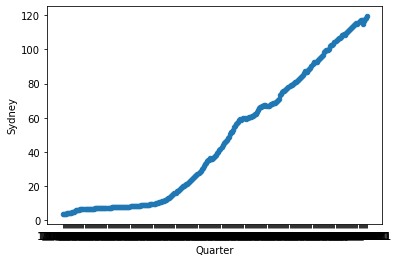

In [25]:
# CPI scatter graph
# Create scatterplot to view the relationship between the two variables
cpi.plot.scatter(y='Sydney', x='Quarter')


0      1/09/1948
50     1/03/1961
100    1/09/1973
150    1/03/1986
200    1/09/1998
250    1/03/2011
Name: Quarter, dtype: object


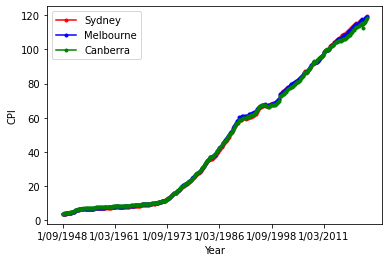

In [19]:
# Create scatterplot to view the relationship is consistent with data from multiple cities

plt.plot(cpi.Quarter,cpi.Sydney, 'r.-', label="Sydney")
plt.plot(cpi.Quarter,cpi.Melbourne, 'b.-', label="Melbourne")
plt.plot(cpi.Quarter,cpi.Canberra, 'g.-', label="Canberra")
print(cpi.Quarter[::50])
plt.xticks(cpi.Quarter[::50])
plt.xlabel('Year')
plt.ylabel('CPI')
plt.legend()
plt.show()

(array([106.,  23.,  19.,  12.,  24.,  24.,  22.,  18.,  19.,  25.]),
 array([  3.7 ,  15.27,  26.84,  38.41,  49.98,  61.55,  73.12,  84.69,
         96.26, 107.83, 119.4 ]),
 <BarContainer object of 10 artists>)

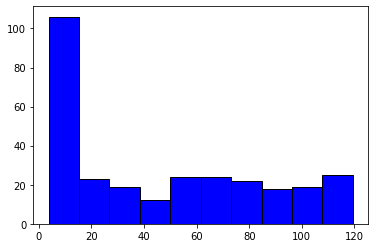

In [58]:
# matplotlib histogram
plt.hist(cpi['Sydney'], color = 'blue', edgecolor = 'black', bins = 10)



### 2. Linear regression model CPI with data from major cities in Australia

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [7]:
import datetime as dt
cpi['Quarter'] = pd.to_datetime(cpi['Quarter'])
cpi['Quarter']=cpi['Quarter'].map(dt.datetime.toordinal)

In [8]:
X = cpi[['Quarter']]
y = np.asarray(cpi['Sydney'])
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30,random_state=1)           


In [9]:
len(X_train) #check the length of train data


204

In [9]:
model = LinearRegression() #create linear regression object
model.fit(X_train, y_train) #train model on train data
model.score(X_train, y_train) #check score

0.9458672770568257

In [32]:
ypredict=model.predict(np.array([[750000]]))
ypredict

array([168.9831071])

In [16]:
ypredict=model.predict(X_test)
ypredict

array([ 40.72208578, 100.11414798, 100.0997963 ,  10.98539157,
        31.9532054 ,  -4.72492114,  23.23216396,  65.19649498,
        19.76862365,  54.70062833,  21.5003938 , -11.71419241,
        44.19997779,  59.91029049, -11.69984072,  -8.23151651,
       110.60044684,   9.25362141,  89.63263302,  73.90318473,
        35.46458467,  38.95682836,  28.46096171,  59.95334555,
        51.17489738,  23.21781228,  47.68265369,  72.17141457,
         5.76137772,  82.67206512,  51.21795243,  28.50401677,
        61.70425129,  63.45037314,  37.21070651,  96.60755261,
       110.58609516, 108.87824448,  84.40383528,  61.68989961,
       105.35729741, 103.59682388,  79.13198247,  72.1427112 ,
        73.91753642,  35.47893635,  21.51474549, 105.3716491 ,
        87.86737559,  26.72919155,  77.38586063,  80.90680769,
         0.51822829,   9.23926973,  61.67554792,  70.43964441,
        33.7471662 , -15.19208441,  -9.93936719,  44.1856261 ,
        49.42877553,  14.48241916,  93.12487671,  59.92

### 3.  Residual Calculation
A residual is the difference between an observed value and a predicted value in a regression model.

In [113]:
# ANSWER
#Actual value is the observed value
#Predicted value is the value of the variable based on regression analysis
#residual value = (actualvalue - predictedvalue)

In [64]:
cpi.describe()

,Quarter,Sydney,Melbourne,Brisbane,Adelaide,Perth,Hobart,Darwin,Canberra,Australia
count,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000
mean,724465.500000,46.666781,46.907877,46.018493,46.257877,46.169521,46.853082,46.957877,46.570205,46.550342
std,7711.601472,38.081718,37.954505,37.666495,37.684170,37.400967,37.579791,37.383572,37.422287,37.849270
min,711135.000000,3.700000,3.800000,3.700000,3.800000,3.700000,3.800000,3.900000,3.900000,3.700000
25%,717712.250000,8.500000,8.900000,8.775000,8.675000,8.775000,9.000000,9.000000,9.000000,8.675000
50%,724465.500000,37.350000,38.150000,37.350000,37.450000,37.500000,38.500000,40.100000,38.400000,37.650000
75%,731218.750000,79.400000,79.600000,76.700000,78.625000,76.525000,78.725000,77.750000,78.100000,78.600000
max,737796.000000,119.400000,119.100000,119.200000,117.800000,116.800000,119.800000,115.600000,118.200000,118.800000


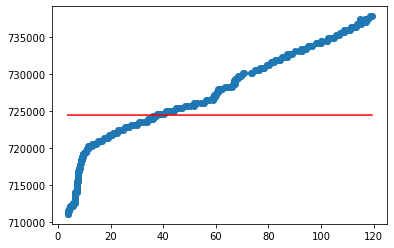

In [121]:
plt.scatter(x,y)
plt.plot(x,m*x+b, 'r')

### 4.  Fit the regression Model
Statsmodels library to perform ordinary least squares regression, using 'Cities' as the predictor variables and 'Date' as the response variable.

In [29]:
# ANSWER
import statsmodels.api as sm
y=cpi['Quarter'].tolist()
x=cpi[['Sydney','Canberra', 'Melbourne','Adelaide','Brisbane','Darwin','Perth']]
x=sm.add_constant(x)
model=sm.OLS(y,x).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.952
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     802.4
Date:                Tue, 07 Sep 2021   Prob (F-statistic):          5.24e-183
Time:                        11:56:57   Log-Likelihood:                -2584.4
No. Observations:                 292   AIC:                             5185.
Df Residuals:                     284   BIC:                             5214.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       7.145e+05    224.817   3178.160      0.0

In [30]:
print(model.ssr) #calculate the residual sum of squares for the model

832871840.5710891


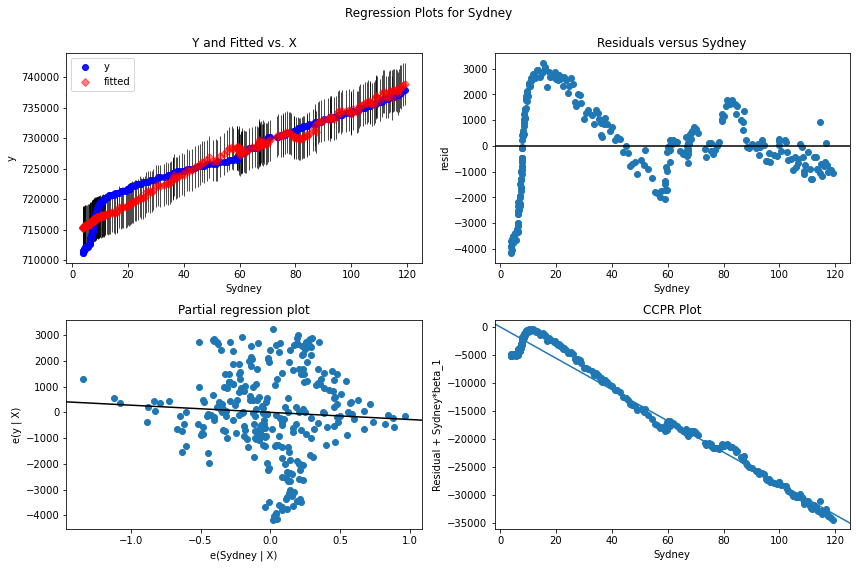

In [31]:
#Residual Vs fitted graph
fig=plt.figure(figsize=(12,8))
fig=sm.graphics.plot_regress_exog(model,'Sydney',fig=fig)

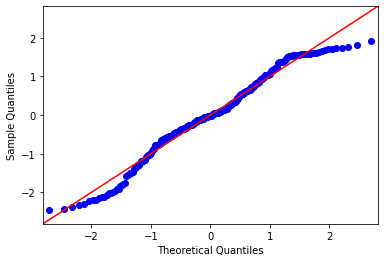

In [32]:
# plot is useful for determining if the residuals follow a normal distribution
res = model.resid
fig = sm.qqplot(res, fit=True, line="45")
plt.show() 

### 5. Conclusion

#1. Is this Model is reliable?

Since the residuals are normally distributed and homoscedastic (random variables have the same finite variance),verified that the assumptions of the simple linear regression model are met. Thus, the output from this model is reliable


In [37]:
#2 Write a function that takes as input a date and a city, and then returns the CPI for the pair
ypredict=model.predict(np.array([[750000]]))
ypredict

array([168.9831071])

In [57]:
#3  What is the average CPI of 2018 for all states?


In [ ]:
#4 what is the impact of CPI when compare with territory data
% can be caluclated

In [ ]:
#5 Measure the annual inflation rate 
(which is the movement of the Consumer Price Index(CPI) 
from one month/period to the same month/period of the previous year expressed as percentage)

In [ ]:
#6 Is this data is good enough for a predictive analysis of CPI, if not what are other parameters to be included?
No, This data is alraedy procesed from no of other input parameters like Food, Housing Price, Health, Transport, Education, Financials etc;
